📘 Título: Análise Exploratória do PIB Global

1. Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid")


2. Carregamento do dataset

In [2]:
# Carregar o arquivo CSV
df = pd.read_csv('gdp.csv')

# Visualizar as primeiras linhas
df.head()


,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40


3. Informações gerais do dataset

In [3]:
# Ver colunas disponíveis
print("Colunas:", df.columns.tolist())

# Informações sobre tipos de dados
df.info()

# Estatísticas descritivas
df.describe()


Colunas: ['Country', 'Region', 'Year', ' GDP_pp ']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


,Country,Region,Year,GDP_pp
count,4419,4419,4419,4419
unique,193,8,23,4387
top,Afghanistan,Europe,1/1/2001,"3,372.76"
freq,23,1063,193,4


4. PIB total por país

In [7]:
print(df.columns.tolist())




['Country', 'Region', 'Year', ' GDP_pp ']


In [8]:
df.columns = df.columns.str.strip()


In [9]:
# Limpar nomes das colunas
df.columns = df.columns.str.strip()

# Agrupar por país e somar o PIB
total_gdp = df.groupby('Country')['GDP_pp'].sum().sort_values(ascending=False)

# Exibir os 10 países com maior PIB acumulado
total_gdp.head(10)


Country
Tajikistan     985.44  928.87  993.61  981.43  416.28  985.3...
Sri Lanka      983.09  982.00  957.04  967.28  873.58  1,044...
Tunisia        968.48  1,006.75  1,046.53  1,083.15  1,117.8...
Taiwan         964.42  937.87  1,130.54  1,266.57  1,442.00 ...
Malaysia       951.51  973.77  996.55  1,239.48  1,337.64  1...
Comoros        949.16  959.19  969.32  979.55  989.90  1,000...
Azerbaijan     946.05  891.19  952.71  940.45  398.65  943.0...
Qatar          946.03  973.90  1,002.58  1,032.11  1,062.50 ...
Belize         925.68  956.67  988.69  1,047.23  1,127.57  1...
Seychelles     919.34  941.10  963.37  1,102.70  1,359.74  1...
Name: GDP_pp, dtype: object

In [10]:
# 🔧 Limpeza e padronização de colunas
df.columns = (
    df.columns
    .str.strip()            # Remove espaços extras
    .str.lower()            # Converte para minúsculas
    .str.replace(' ', '_')  # Substitui espaços por underline
)

# 🔍 Visualizar colunas após limpeza
print("Colunas padronizadas:", df.columns.tolist())


Colunas padronizadas: ['country', 'region', 'year', 'gdp_pp']


In [11]:
# Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Remover linhas com valores nulos (se necessário)
df = df.dropna()

# Verificar duplicatas
print("Duplicatas:", df.duplicated().sum())

# Remover duplicatas (se necessário)
df = df.drop_duplicates()


Valores nulos por coluna:
country    0
region     0
year       0
gdp_pp     0
dtype: int64
Duplicatas: 0


In [12]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')


5. Evolução do PIB global ao longo dos anos

In [14]:
print(df.columns.tolist())



['country', 'region', 'year', 'gdp_pp']


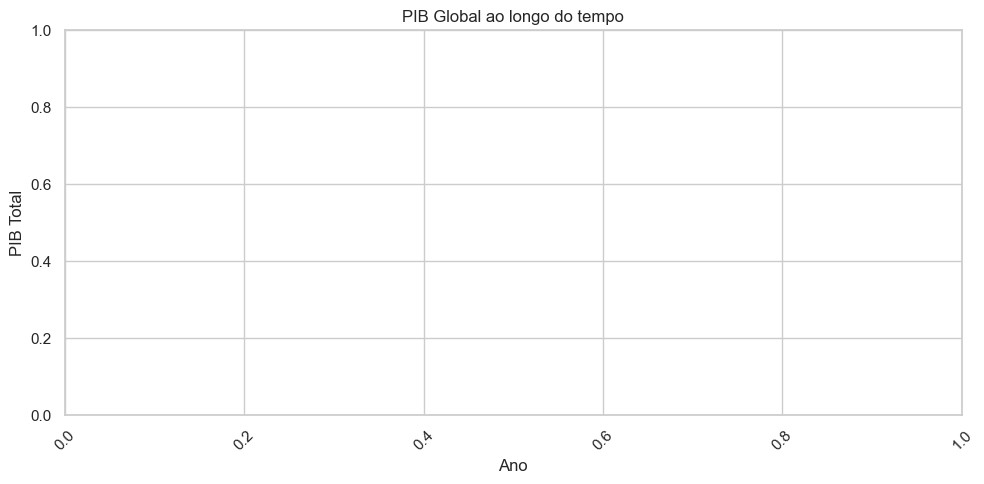

In [15]:
# Agrupar por ano
gdp_by_year = df.groupby('year')['gdp_pp'].sum()

# Plotar gráfico
plt.figure(figsize=(10,5))
sns.lineplot(x=gdp_by_year.index, y=gdp_by_year.values, marker='o')
plt.title('PIB Global ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('PIB Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# Agrupar por região e ano
gdp_by_region_year = df.groupby(['region', 'year'])['gdp_pp'].sum().reset_index()

# Visualizar os dados
gdp_by_region_year.head()


,region,year,gdp_pp


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


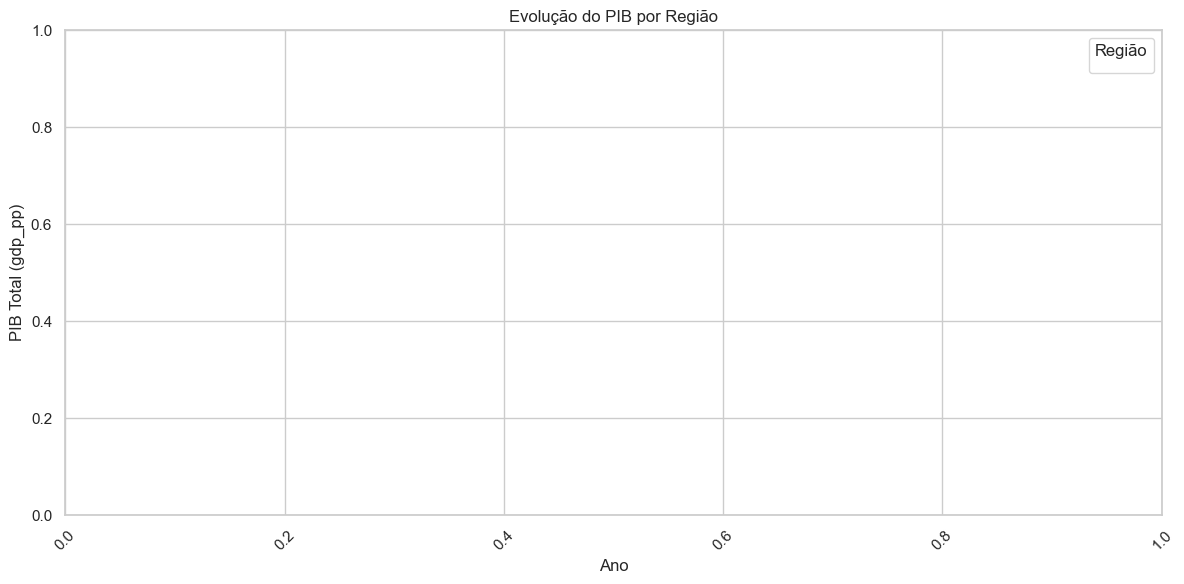

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=gdp_by_region_year, x='year', y='gdp_pp', hue='region', marker='o')
plt.title('Evolução do PIB por Região')
plt.xlabel('Ano')
plt.ylabel('PIB Total (gdp_pp)')
plt.xticks(rotation=45)
plt.legend(title='Região')
plt.tight_layout()
plt.show()


In [18]:
# Agrupar por região e ano
gdp_by_region_year = df.groupby(['region', 'year'])['gdp_pp'].sum().reset_index()

# Calcular a taxa de crescimento
gdp_by_region_year['growth_rate'] = gdp_by_region_year.groupby('region')['gdp_pp'].pct_change()

# Visualizar os primeiros resultados
gdp_by_region_year.head(10)


,region,year,gdp_pp,growth_rate


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


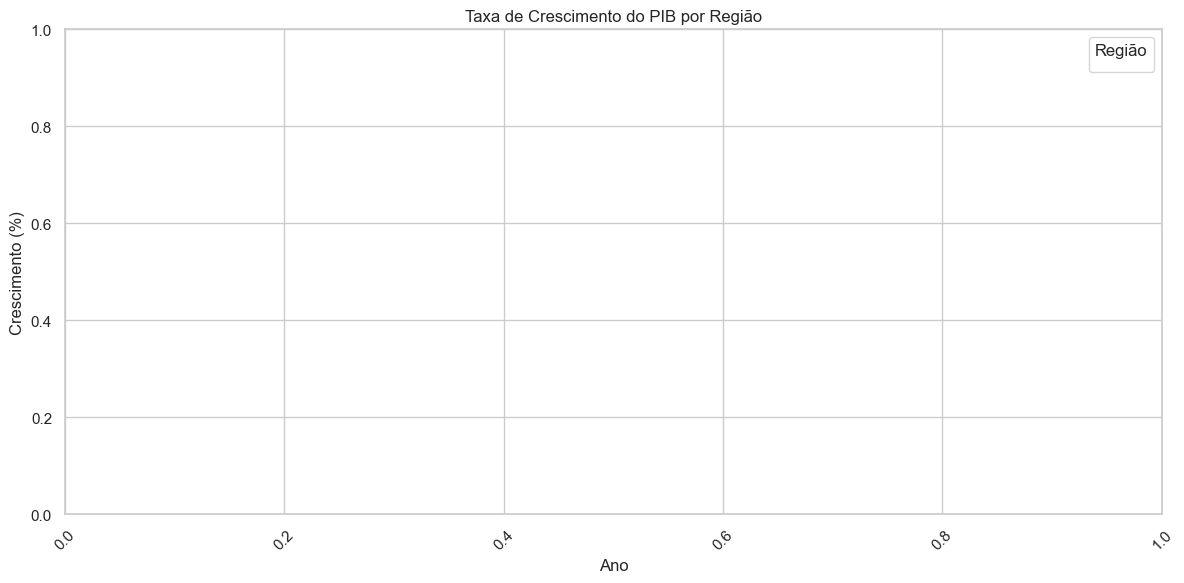

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(data=gdp_by_region_year, x='year', y='growth_rate', hue='region', marker='o')
plt.title('Taxa de Crescimento do PIB por Região')
plt.xlabel('Ano')
plt.ylabel('Crescimento (%)')
plt.xticks(rotation=45)
plt.legend(title='Região')
plt.tight_layout()
plt.show()


6. Taxa de crescimento do PIB por país

In [21]:
print(df['gdp_pp'].dtype)


object


In [22]:
df['gdp_pp'] = pd.to_numeric(df['gdp_pp'], errors='coerce')


In [23]:
df = df.sort_values(['country', 'year'])


In [25]:
df['gdp_growth'] = df.groupby('country')['gdp_pp'].pct_change(fill_method=None)



In [26]:
pip install ipywidgets plotly


Note: you may need to restart the kernel to use updated packages.


In [29]:
# Remover valores nulos e duplicados
paises_validos = df['country'].dropna().unique()
anos_validos = sorted(df['year'].dropna().unique())


In [30]:
import ipywidgets as widgets
from IPython.display import display

# Dropdowns com valores válidos
pais_dropdown = widgets.Dropdown(options=paises_validos, description='País:')
ano_dropdown = widgets.Dropdown(options=anos_validos, description='Ano:')

display(pais_dropdown, ano_dropdown)


Dropdown(description='País:', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and …

Dropdown(description='Ano:', options=(), value=None)

In [31]:
def mostrar_dados(pais, ano):
    dados = df[(df['country'] == pais) & (df['year'] == ano)]
    display(dados)

# Executar com seleção atual
mostrar_dados(pais_dropdown.value, ano_dropdown.value)


,country,region,year,gdp_pp,gdp_growth


In [33]:
import plotly.express as px

# Escolher o ano
ano_escolhido = 2020  # ou ano_dropdown.value

# Filtrar dados do ano
df_ano = df[df['year'] == ano_escolhido]

# Ordenar por PIB
df_ano = df_ano.sort_values(by='gdp_pp', ascending=False)

# Gráfico interativo com cor por região
fig = px.bar(
    df_ano,
    x='country',
    y='gdp_pp',
    color='region',
    title=f'PIB por país em {ano_escolhido}',
    labels={'gdp_pp': 'PIB (gdp_pp)', 'country': 'País'},
    hover_data=['region']
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [34]:
if 'population' in df.columns:
    df['gdp_per_capita'] = df['gdp_pp'] / df['population']
    print(df[['country', 'year', 'gdp_per_capita']].dropna().head(10))
else:
    print("Coluna 'population' não encontrada no dataset.")


Coluna 'population' não encontrada no dataset.
